# Исследование объявлений о продаже квартир

### Цель исследования 

 - установить параметры, влияющие на рыночную стоимость объектов недвижимости, исследовав архив 
объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет (данные сервиса 
Яндекс.Недвижимость).  

    * по каждой квартире на продажу доступны два вида данных: вписанные пользователем и полученные автоматически на основе картографических данных. 

### Общий вывод
- основное влияние на стоимость квартиры оказывают метраж (общая площадь квартиры, жилая площадь квартиры, количество комнат), этаж и расположение (расстояние до центра, парка, водоема).

# Описание данных

*Путь к файлу:*
`/datasets/real_estate_data.csv`. 

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Инструменты
* pandas, matplotlib

# Загрузка файла и обзор данных <a id='p1'></a>


In [1]:
# загрузка библиотек

import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_columns = 30
import warnings
warnings.filterwarnings("ignore") 

In [2]:
# загрузка файла 
data =  pd.read_csv('/datasets/real_estate_data.csv', sep ='\t')
    

In [3]:
#выведем общую информацию
def basa(data):
    print(f'В датафрейме {data.shape[0]} строк (=квартир)')
    print()
    data.info()
    display(data.head())
    print('Пропуски')
    display(data.isna().sum())
    print(f'В датафрейме {data.duplicated().sum()} дубликатов')


In [4]:
basa(data)

В датафрейме 23699 строк (=квартир)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-n

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Пропуски


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В датафрейме 0 дубликатов


In [5]:
#посмотрим долю пропусков
pd.DataFrame(round(data.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
is_apartment,88.300000
parks_nearest,65.900000
ponds_nearest,61.600000
balcony,48.600000
ceiling_height,38.800000
airports_nearest,23.400000
cityCenters_nearest,23.300000
ponds_around3000,23.300000
parks_around3000,23.300000
days_exposition,13.400000


Пропуски в locality_name и floors_total менее 1%, kitchen_area и living area - 8-10%, доли практически равна, days_exposition - 13% пропусков.

Столбцы про парки и водоемы в радиусе 3 км имеют одинаковую долю пропусков, 23.3 %, скорее всего, это одни и те же квартиры. 

В airports_nearest пропусков немного больше - 23.4%.

Высота потолков - 39% 

Балконы - 49%.

Парки и водоемы поблизости - 66% и 62%.

Апартаменты - 88% (самая большая доля).

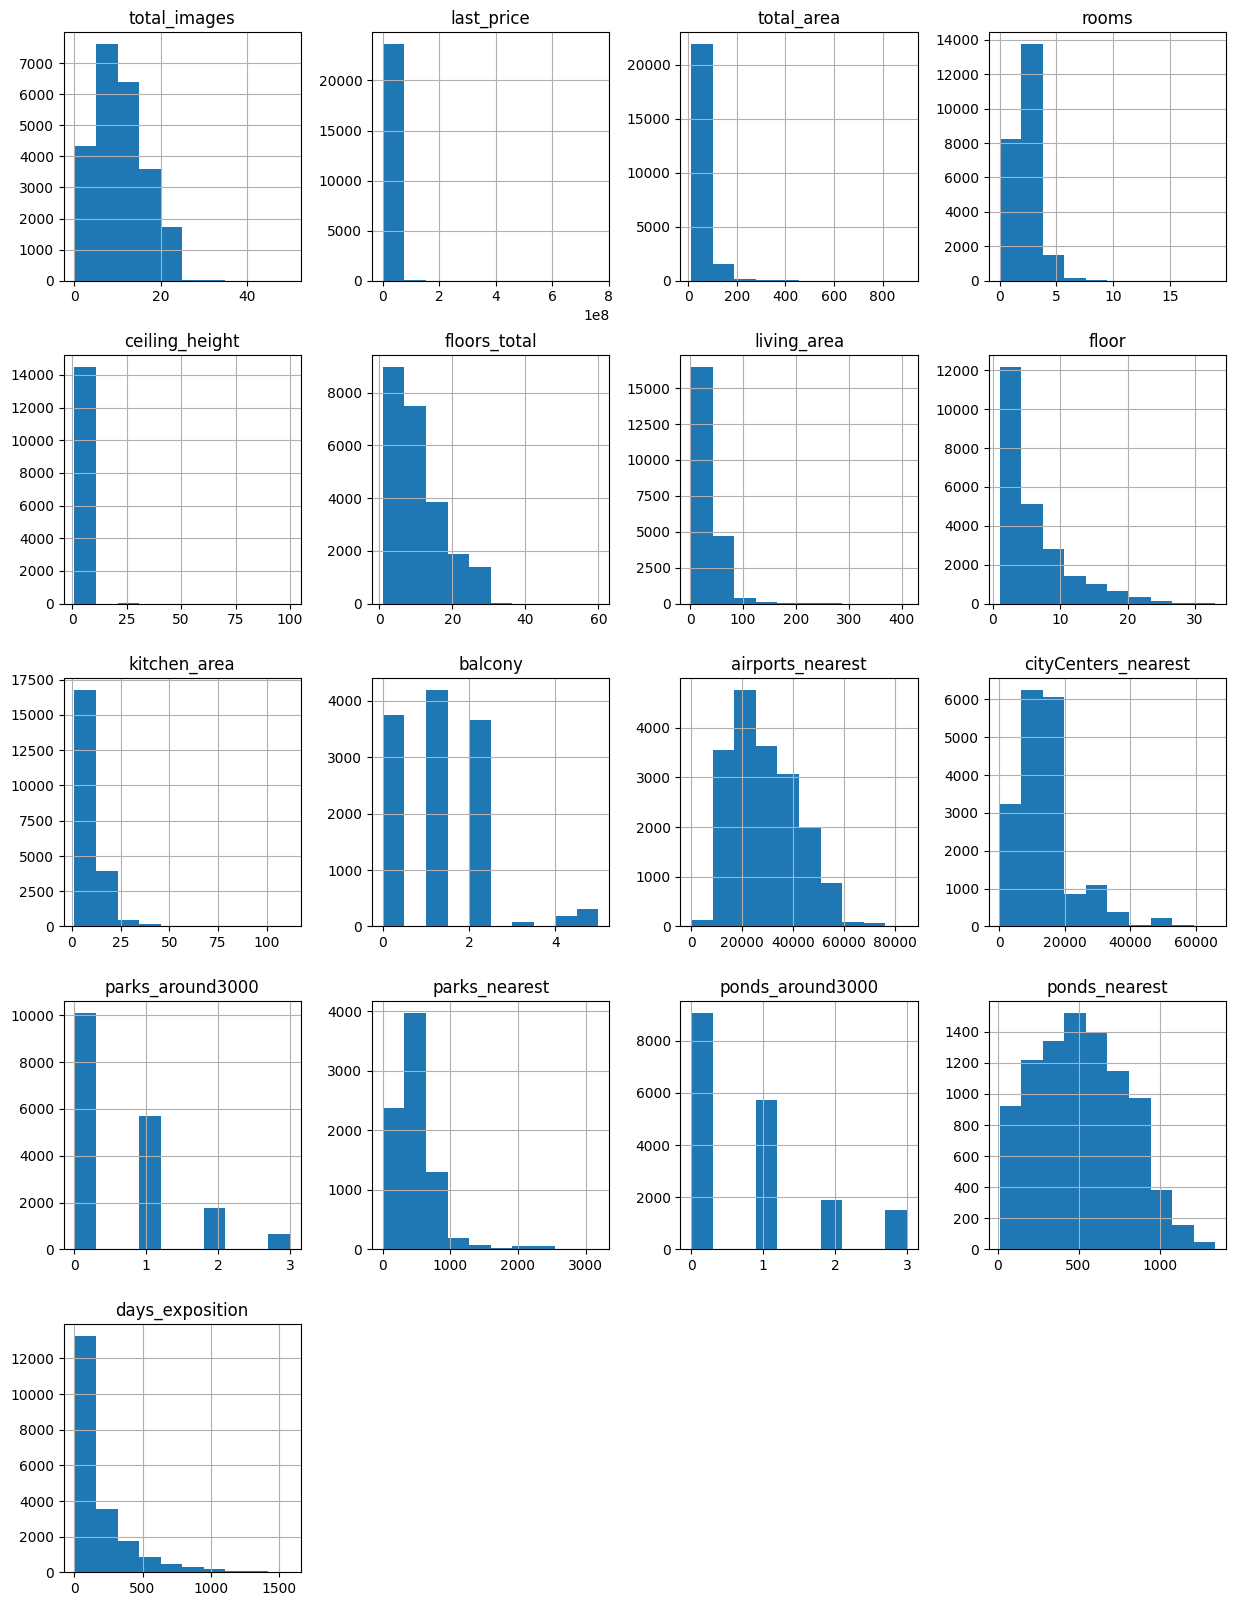

In [6]:
#визуализируем числовые данные
data.hist(figsize=(15,20));

### Промежуточный вывод

В данных 23699 строк, что может дать первичную информацию о количестве квартир, выставленных на продажу, а также 22 столбца - критерии, по которым покупатели могут оценить квартиру.

По типу данных можем выделить 3 столбца с целочисленными данными (int64), 14 столбцов - с числовыми данными (float64), 3 столбца типа object и 2 столбца с булевым типом (bool). 

В определении типов данных наблюдаются ошибки, которые нужно будет исправить:

* first_day_exposition -> datetime - дата 
* is_apartment -> bool, булевое значение (да/нет)
* balcony object -> int64, кол-во балконов - целочисленное значение
* parks_around3000 -> int64, кол-во парков
* parks_nearest -> float64, расстояние может быть любым
* ponds_around3000 -> int64, кол-во прудов
* days_exposition -> int64, кол-во дней

Также наблюдаем разницу в количестве строк в столбцах, в данных есть пропуски, которые нужно изучить. Скорее всего, пропуски связаны с человеческим фактором, владельцы могли просто не указать данные, могли быть технические ошибки и картографические данные не определились, либо пропуски означают отсутствие критерия как такового.

#### Пропуски имеются в столбцах:
 
* ceiling_height (9195) - большое количество пропусков, восстановим по среднему значению в зависимости от расстояния до центра;
* floors_total (86) - незначительное количество пропусков, удалим
* living_area (1903) - незначительное количество пропусков, данные важны для исследования, однако их сложно заполнить достоверными значениями, заменим исходя из общей площади и площади кухни.
* is_apartment (20924) - пропусков очень много, скорее всего эти квартиры - не аппартаменты, это булевые значения, заменим на False
* kitchen_area (2278) - пропуски заполним по среднему значению исходя из общей и жилоц площадей. 
* balcony (11519) - около половины пропусков, возможно, балконов нет, заменим на 0
* locality_name (49) - незначительное количество пропусков, удалим
* airports_nearest (5542) - скорее всего, аэропортов рядом нет, сделаем срез при исследовании параметра
* cityCenters_nearest (5519) - скорее всего, до центра далеко, сделаем срез при исследовании параметра
* parks_around3000 (5518) - скорее всего, парков в радиусе 3 км нет, сделаем срез при исследовании параметра
* parks_nearest (15620) - скорее всего, парков рядом нет, сделаем срез при исследовании параметра
* ponds_around3000 (5518) - скорее всего, прудов в радиусе 3 км нет, сделаем срез при исследовании параметра
* ponds_nearest (14589) - скорее всего, прудов рядом нет, сделаем срез при исследовании параметра


#### Имеются аномалии - статистические данные, нуждающиеся в проверке:

* last_price - минимальная стоимость квартиры 12 тыс, что невозможно, максимальная стоимость - 763 млн, при этом медиана - 4.650.000, значение похоже на выброс.
* rooms - минимальное значение 0, нужно проверить, студии ли это.
* ceiling_height - максимальная высота в многоэтажных домах может доходить до 4 метров, однако мы видим двузначные числа, скорее всего это ошибка владельца квартиры, разделим на 10.* ceiling_height - минимальная высота потолка 1 м, что невозможно, однако значения вряд ли повлияют на результаты, оставим. Двузначные значения нужно исправить.
* living_area - минимальная жилая площадь 2 м², что невозможно. То же самое с площадью кухни, kitchen_area, минимальное значение 1.3 м². Нужно удалить. В случае с кухней предварительно проверить, не студия ли это.
* days_exposition - нет информации о количестве дней размещения объявления, возможно, оно было не размещено, или произошла техническая ошибка. Исключим при изучении переменной.

#### Явные дубликаты отсутствуют.

#### Первичные наблюдения:
1) В среднем владельцы квартир выкладывают до 20 фото;


2) Подавляюще большее количество квартир стоит менее 100 млн, имеется небольшое количество квартир стоимостью выше, имеются выбросы;


3) Большая часть квартир имеет площадь до 100 м², около 2000 квартир имеют площадь до 200 м², несколько квартир с большей площадью;


4) В квартирах преимущественно до 5 комнат;


5) Высота потолков имеет неоднозначное значение, которое будем исправлять, по графику кажется, что около 10 метров;


6) Дома преимущественно 15-16 этажные, остальные ниже 40 (согласно статистике dominfospb.ru, самое высокое здание в СПб - ЖК "Александр Невский", 36 этажей);


7) Жилая площадь преимущественно до 50 м², а также менее 100 м²;


8) Большая часть квартир находится с 1 по 10 этаж, часть также с 11 по 20, и меньшее количество до 30 этажа;


9) Площадь кухни около 15 м², либо менее 25 м²;


10) Квартиры в среднем имеют до 2 балконов, однако по многим квартирам данные отсутствуют (считаем, что балконов нет)


11) Квартиры находятся преимущественно в 20 километрах от аэропорта, в целом до 60 км.


12) Большая часть квартир расположена в 1-20 км от центра города, а также до 40 км. Стоит учитывать, что более 5000 квартир не имеют этой информации.


13) Более 5000 квартир не имеют информации о близости парков, возможно, парка рядом нет. В целом количество парков доходит до 3. Также более 15000 квартир не имеют информации о расстоянии до ближайшего парка, что не даст получить цельную картинку о взаимосвязи по выборке. Из указанных данных большинство парков находится на расстоянии до 1 км.


14) Такая же ситуация с прудами. Более 5000 квартир не имеют информацию о расположении прудов, более 15000 не указали расстояние до ближайшего пруда. Из имеющихся данных - пруды находятся в 1 км от дома, пик наблюдается на 500 м. 


15) Объявления на сайтах по большей части висят до 260 дней, однако стоит учитывать, что эта информация может быть неточной: объявление могли не выложить (в случае отсутствия данных), объявление могли снять до продажи, а могли не снять после. Будем считать, что это время до продажи.

## 2. Предобработка данных

In [7]:
#обработаем выявленные проблемы в данных
#переименуем столбцы в соответствии со стилем snake_case
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})

In [8]:
#обработаем имеющиеся пропуски, заменим тип данных
data['ceiling_height'] = data['ceiling_height'].astype('float64')
data['living_area'] = data['living_area'].astype('float64')
data['is_apartment'] = data['is_apartment'].fillna('False').astype('bool')
data['balcony'] = data['balcony'].fillna('0').astype('int64')
data['city_centers_nearest'] = data['city_centers_nearest'].astype('float64')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['floors_total'] = data['floors_total'].fillna('0').astype('int64')
data['locality_name'] = data['locality_name'].fillna('unknown').astype('str')

In [9]:
#ищем неявные дубликаты в названиях населенных пунктов
#set(data['locality_name'].unique()) - закомментировано из-за длины списка

In [10]:
#дубликаты в столбце locality_name
#приведем все значения к одному регистру, заменим ё на е
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [11]:
data = data.apply(lambda x: x.replace({'поселок городского типа': 'пгт', 'поселок':'пгт', 'городской пгт':'пгт', 
                                       'деревня':'дер', 'жилпгт':'жилпоселок',
                                      'пгт при железнодорожной станции':'пгт станции', 'дер кудрово':'кудрово',
                                      'пгт любань':'любань', 'пгт мурино':'мурино', 'коттеджный пгт':'кпгт',
                                       'садоводческое некоммерческое товарищество':'снт', 'садовое товарищество':'ст', 
                                       'пгт гарболово':'дер гарболово', 'дер зимитицы':'пгт зимитицы', 
                                       'дер калитино':'пгт калитино'}, regex=True))
len(data.locality_name.unique())

330

In [12]:
#заполним пропуски в столбцах 'living_area' и 'kitchen_area'
for la in data['total_area'].unique():
    data.loc[(data['total_area'] == la) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['total_area'] == la), 'living_area'].mean()
    
for k in data['living_area'].unique():
    data.loc[(data['living_area'] == k) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['living_area'] == k), 'kitchen_area'].mean()
    
for ka in data['total_area'].unique():
    data.loc[(data['total_area'] == k) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['total_area'] == k), 'kitchen_area'].mean()
    
for l in data['kitchen_area'].unique():
    data.loc[(data['kitchen_area'] == la) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['kitchen_area'] == la), 'living_area'].mean()

In [13]:
#проверим пропуски в living_area 
display(data['living_area'].isna().sum()) 

143

In [14]:
#проверим пропуски в kitchen_area
display(data['kitchen_area'].isna().sum()) 

564

In [15]:
#часть пропусков удалось заполнить, остальные заменим на медиану

data.fillna(data['living_area'].median(), inplace = True)
data.fillna(data['kitchen_area'].median(), inplace = True)

In [16]:
#проверим пропуски в living_area 
display(data['living_area'].isna().sum())

0

In [17]:
#проверим пропуски в kitchen_area
display(data['kitchen_area'].isna().sum())

0

In [18]:
data['floors_total'] = data['floors_total'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [19]:
#заполним этажи медианой
data.fillna(data['floors_total'].median(), inplace = True)
data['floors_total'].isna().sum()

0

Пропуски обработаны

### Аномалии

#### Высота потолков

In [20]:
display(data['ceiling_height'].describe()) #посмотрим описание

count    23699.000000
mean        13.335914
std         13.305149
min          1.000000
25%          2.600000
50%          2.950000
75%         30.000000
max        100.000000
Name: ceiling_height, dtype: float64

In [21]:
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = data['ceiling_height'] / 10 #поделим двузначные значения на 10

In [22]:
#заполним высоту медианой
data.fillna(data['ceiling_height'].median(), inplace = True)

In [23]:
#проверим
display(data['ceiling_height'].isna().sum())

0

In [24]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.833595
std          0.269410
min          1.000000
25%          2.600000
50%          2.950000
75%          3.000000
max         10.000000
Name: ceiling_height, dtype: float64

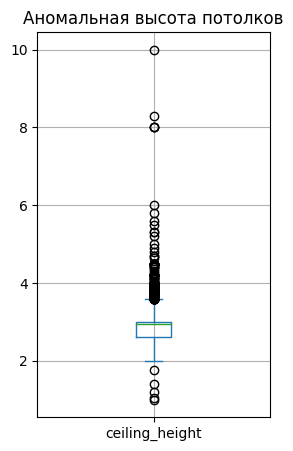

In [25]:
data.plot(y = 'ceiling_height', kind = 'box',grid=True, figsize=(3,5)); #посмотрим на выбросы
plt.title('Аномальная высота потолков');

Аномалия: потолки не могут быть ниже 2.5 метров.  

In [26]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.833595
std          0.269410
min          1.000000
25%          2.600000
50%          2.950000
75%          3.000000
max         10.000000
Name: ceiling_height, dtype: float64

#### Жилая площадь

In [27]:
display(data['living_area'].describe()) #посмотрим описание

count    23699.000000
mean        34.419081
std         21.761726
min          2.000000
25%         18.702116
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

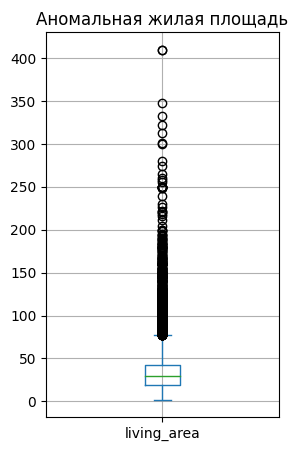

In [28]:
data.plot(y = 'living_area', kind = 'box',grid=True, figsize=(3,5)); #посмотрим на выбросы 
plt.title('Аномальная жилая площадь');

In [29]:
#рассчитаем квартили
q1_living = data['living_area'].quantile(.25) #Q1
q3_living = data['living_area'].quantile(.75) #Q3
iqr_living = q3_living - q1_living #IQR

In [30]:
#рассчитаем верхнюю границу
display(iqr_living + 1.5 * q3_living)

86.54788359788361

=> допустимы значения менее 86.6 кв.м., однако выбросов слишком много, чтобы удалять их из данных

In [31]:
#проверим, есть ли в датасете моноапартаменты (мин.площадь - 6 кв.м.), добавив столбец is_monoapart

def mono (row):
    try:
        if total_area < 14 and is_apartment == True in row:
            return 'mono'
    except: 
        return 'not_mono' 
    
data['is_monoapart'] = data['is_apartment'].apply(mono)

In [32]:
#посмотрим уникальные значения
display(data['is_monoapart'].value_counts().unique())      

array([23699], dtype=int64)

=> моноквартиры не обнаружены => пользуемся фед. нормами, площадь квартиры не может быть менее 14 кв.м., заменим эти данные на значение медианы

In [33]:
data['living_area'] = data['living_area'].where(data['living_area'] >= 14, other = data['living_area'].median())
data['living_area'].describe()

count    23699.000000
mean        34.675191
std         21.599224
min         14.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

#### Цена 

In [34]:
display(data['last_price'].describe()) #посмотрим описание

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

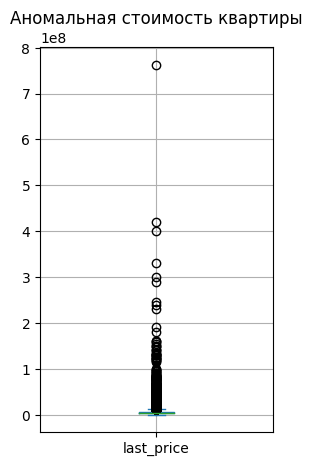

In [35]:
data.plot(y = 'last_price', kind = 'box',grid=True, figsize=(3,5)) #изучим график
plt.title('Аномальная стоимость квартиры');

=> есть выбивающиеся значения, оказывающие сильное влияние на разницу между mean и median

In [36]:
#рассчитаем квантили для определения нормальных значений
q1_price = data['last_price'].quantile(.25) #Q1
q3_price = data['last_price'].quantile(.75) #Q3
iqr_price = q3_price - q1_price 

In [37]:
#найдем максимальное значение
display(iqr_price + 1.5 * q3_price) #максимально допустимое значение 13.6 млн, остальное выбросы. 
#удалим выбросы больше 500 млн.

13600000.0

In [38]:
#найдем минимальное значение
display(iqr_price - 1.5 * q3_price) 

-6800000.0

=> получили отрицательное значение, нужно проверить значения ниже 0, они могут быть ошибками

In [39]:
display((data['last_price'] < 0).sum()) 

0

Ошибок нет

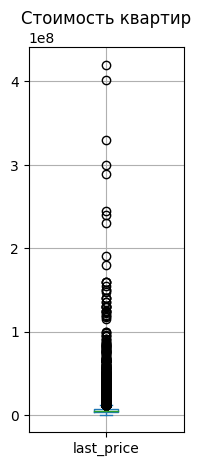

In [40]:
#удалим выбросы и посмотрим на распределение
data = data.query('last_price > 1.219000e+04 & last_price <= 5.000000e+08')
data.plot(y = 'last_price', kind = 'box',grid=True, figsize=(2,5));
plt.title('Стоимость квартир');

Огромная часть выборки больше нормальных значений даже с учетом IQR. Скорее всего, связано с тем же трендом: растет площадь квартиры, соответственно, растет цена. Проверим это корреляцией. 

#### 0 комнат - студия?

In [41]:
studio_room = data.query('rooms == 0 & studio == True') #сделаем подходящий под условия срез

In [42]:
display(studio_room.pivot_table(index='studio', values='rooms', aggfunc='count')) #138 квартир без комнат являются студиями

,rooms
studio,
True,138


In [43]:
display(len(data.query('rooms == 0 & studio == False'))) #59 квартир с ошибкой в количестве комнат

59

In [44]:
#добавим столбец с определением квартиры в зависимости от количества комнат, удалим квартиры без комнат
def rooms_and_studio (row):
    rooms = row['rooms']
    studio = row['studio']
    if rooms == 0 and studio == False:
        return 'delete'
    elif rooms == 0 and studio == True:
        return 'studio'
    else:
        return 'flat'
    
data['rooms_and_studio'] = data.apply(rooms_and_studio, axis=1)

In [45]:
data = data.query('rooms_and_studio != "delete" ') #уберем строки с ошибками

In [46]:
#изучим новую таблицу 
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,is_monoapart,rooms_and_studio
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,30.0,not_mono,flat
1,7,3350000.0,40.40,2018-12-04,1,3.00,11,18.6,1,True,False,False,11.000000,2,пгт шушары,12817.0,18603.0,0.0,30.0,0.0,30.0,81.0,not_mono,flat
2,10,5196000.0,56.00,2015-08-20,2,3.00,5,34.3,4,True,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,not_mono,flat
3,0,64900000.0,159.00,2015-07-24,3,3.00,14,80.2,9,True,False,False,11.733333,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,not_mono,flat
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,not_mono,flat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,False,False,13.830000,0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,30.0,not_mono,flat
23695,14,3100000.0,59.00,2018-01-15,3,3.00,5,38.0,4,True,False,False,8.500000,0,тосно,30.0,30.0,30.0,30.0,30.0,30.0,45.0,not_mono,flat
23696,18,2500000.0,56.70,2018-02-11,2,3.00,3,29.7,1,True,False,False,8.615873,0,село рождествено,30.0,30.0,30.0,30.0,30.0,30.0,30.0,not_mono,flat
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.0,12,True,False,False,23.300000,2,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,not_mono,flat


#### Маленькие и нулевые кухни - студии? 

In [47]:
studio_kitchen = data.query('kitchen_area <= 5 & studio == True') #сделаем подходящий под условия срез

In [48]:
#посмотрим, сколько квартир являются студиями
display(studio_kitchen.pivot_table(index='studio', values='kitchen_area', aggfunc='count')) #1 квартира является студией 

,kitchen_area
studio,
True,1


In [49]:
#посмотрим на квартиры с маленькой кухней, которые не являются студиями
display(len(data.query('kitchen_area <= 5 & studio == False')))

474

Пропусков слишком много. Заполним медианой.


Значения меньше 5 также заполним медианой.

In [50]:
data.fillna(data['kitchen_area'].median(), inplace = True)
data['kitchen_area'] = data['kitchen_area'].where(data['kitchen_area'] >= 5, other = data['kitchen_area'].median())
data['kitchen_area'].describe()

count    23638.000000
mean        11.048448
std          6.409468
min          5.000000
25%          7.300000
50%          9.400000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

### Вывод

Предобработка данных делится на 4 этапа: обработка типов данных и названий; обработка пропусков; обработка неявных дубликатов; обработка аномалий.

Были исправлены ошибки в названиях столбцов ('cityCenters_nearest', 'parks_around3000', 'ponds_around3000') и типах переменных.

Некоторые строки, имеющие небольшое количество, были удалены.

Были устранены неявные дубликаты в столбце 'locality_name'. Переменные были приведены к единому регистру, ё поменяли на е. Поменяли некоторые повторы типа "деревня кудрово -> кудрово" в связи с изменением статуса поселения или ошибок. Также для удобства сократили типы населенных пунктов: поселок городского типа/городской поселок/поселок -> пгт, деревня -> дер, коттеджный пгт -> кпгт, пгт при железнодорожной станции -> пгт станции, садоводческое некоммерческое товарищество -> снт, садовое товарищество -> ст. 

Определили, что явные дубликаты отсутствуют.

#### Был устранен ряд аномалий:

***Высота потолков***: 


В соответствии с СНиП, минимальная высота потолков в жилых объектах - 2.5 с, верхняя планка не регламентируется, обычно до 4. Так как нужно изменить двузначные значения, мы разделили на 10 числа больше 10. После обработки данных мы получили максимальное значение 10. Медиана - 3. Выбросы заменили медианой.

***Жилая площадь***: 


Определили, что среднее значение и медиана имеют практически одинаковое значение (34.2 и 30), минимальное значение 2, максимальное 409.7. Допустимы значения до 86.5 м. Согласно СНиПам площадь однокомнатной квартиры не может быть ниже 14 м. Однако данное правило не распространяется на микроквартиры, мировой тренд в сфере недвижимости, которые могут быть только апартаментами, и застройщики ориентируются на минимальную норму в 6 кв.м. на человека. Анализ показал, что в датасете моноквартиры отсутствуют, поэтому все значения меньше 14 заполнили медианой. Минимальное значение стало 14.

***Цена***: 

Отклонение в ценновом параметре более 10 млн, а среднее и медиана различаются в 2 млн. В выборке много выбросов. Предполагаем, что в новостройках увеличилась площадь квартир, вместе с этим выросла цена. Минимальное значение составило 12.190, максимальное - 763 млн. Максимально допустимо значение 13.6 млн, остальное - выбросы. Однако за выбросы нужно было принять больше 1000 квартир, что много для удаления и могло нарушить результаты. Взяли в расчет стоимость до 500 млн, поскольку выше этой стоимости только 1 квартира.

***Квартиры без комнат***: 


В датасете имеются квартиры без комнат (0). Мы предположили, что эти квартиры могут являться студиями. В целом, гипотеза оправдала себя, 138 квартир из 197 действительно оказались студиями. Остальные 59 квартир были удалены.

***Квартиры с маленькими кухнями***: 


При анализе аномалий в площади кухни мы руководствовались тем, что по стандартам площадь кухни не может быть менее 5 кв.м. Соответственно, если квартира не является студией, ее площадь не может быть меньше этого значения. Проверили эту гипотезу. Под это условие подошла только одна квартира-студия, а 474 квартиры таковыми не являются. Количество большое, а данные важны, поэтому все значения меньше 5 заполнили медианой.

### Добавляем новые столбцы в таблицу

*для дополнительного анализа

In [51]:
#рассчитаем стоимость одного квадратного метра, добавим в таблицу
data['sq_meter_price'] = data['last_price'] / data['total_area']
data['sq_meter_price'] = data['sq_meter_price'].round()

In [52]:
#добавим столбцы с днями недели, месяцами и годами публикации объявления
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

In [53]:
#добавим категории этажей: первый, последний, другой
def floor_cat(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor_cat, axis=1)

In [54]:
#посмотрим на распределение этажей
display(data['floor_type'].value_counts())

floor_type
другой       17395
последний     3329
первый        2914
Name: count, dtype: int64

In [55]:
#добавим столбец с расстоянием до центра города в км
data['city_center_km'] =  round(data['city_centers_nearest'] / 1000) 

# Исследовательский анализ данных

### Вопрос:  
* Какие факторы больше всего влияют на общую (полную) стоимость объекта?


#### Задачи:
* изучить общую площадь, жилую площадь, площад кухни, количеств комнат, этаж, на котором расположена квартира (первый, последний, другой), даты размещения (день недели, месяц, год).
* построить графики, которые покажут зависимость цены от указанных выше параметров (используя для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
* посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
* выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
* выделить квартиры в Санкт-Петербурге с помощью столбца locality_name, вычислить среднюю цену каждого километра, описать, как стоимость объектов зависит от расстояния до центра города.

In [56]:
display(data) #изучим таблицу после предобработки 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,is_monoapart,rooms_and_studio,sq_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type,city_center_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,30.0,not_mono,flat,120370.0,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,3.00,11,18.6,1,True,False,False,11.000000,2,пгт шушары,12817.0,18603.0,0.0,30.0,0.0,30.0,81.0,not_mono,flat,82921.0,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,3.00,5,34.3,4,True,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,not_mono,flat,92786.0,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,3.00,14,80.2,9,True,False,False,11.733333,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,not_mono,flat,408176.0,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,not_mono,flat,100000.0,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,False,False,13.830000,0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,30.0,not_mono,flat,72491.0,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,3.00,5,38.0,4,True,False,False,8.500000,0,тосно,30.0,30.0,30.0,30.0,30.0,30.0,45.0,not_mono,flat,52542.0,0,1,2018,другой,0.0
23696,18,2500000.0,56.70,2018-02-11,2,3.00,3,29.7,1,True,False,False,8.615873,0,село рождествено,30.0,30.0,30.0,30.0,30.0,30.0,30.0,not_mono,flat,44092.0,6,2,2018,первый,0.0
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.0,12,True,False,False,23.300000,2,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,not_mono,flat,149511.0,1,3,2017,другой,10.0


### Изучим ряд параметров объектов: 
* общая площадь (в среднем 52 кв.м.); 
* жилая площадь (в среднем 30 кв.м.); 
* площадь кухни (в среднем 9 кв.м.); 
* количество комнат (в среднем от 1 до 3 комнат); 
* высота потолков (3 м); 
* этаж квартиры (медиана 4); 
* тип этажа квартиры («первый - 2914», «последний - 3329», «другой - 17395»); 
* общее количество этажей в доме (чаще всего пяти-, девяти- и шестнадцатиэтажки); 
* расстояние до центра города в метрах (2-15 км.); 
* расстояние до ближайшего аэропорта (10-34 км, медиана - 20 км); 
* день и месяц публикации объявления (вторник, четверг, пятница; февраль, июль, ноябрь).

Отметим, что медиана и среднее значение в данных параметрах находятся практически на одном уровне.

* цена объекта (3.4-7 млн.руб., медиана 4.65 млн.)

=> *в скобочки внесены полученные в результате средние значения* 



In [57]:
display(data.describe()) #посмотрим описание переменных 
data['floor_type'].value_counts()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sq_meter_price,exposition_weekday,exposition_month,exposition_year,city_center_km
count,23638.000000,2.363800e+04,23638.000000,23638,23638.000000,23638.000000,23638.000000,23638.000000,23638.000000,23638.000000,23638.000000,23638.000000,23638.000000,23638.000000,23638.000000,23638.000000,23638.000000,23638.000000,2.363800e+04,23638.000000,23638.000000,23638.000000,23638.000000
mean,9.864286,6.516389e+06,60.401216,2017-11-08 22:43:21.844487680,2.075599,2.833247,10.617226,34.703705,5.882097,11.048448,0.589432,22088.751671,10903.126957,7.437262,187.198113,7.558677,217.602166,160.855022,9.933515e+04,2.568026,6.395000,2017.367671,10.891150
min,0.000000,4.300000e+05,12.000000,2014-11-27 00:00:00,0.000000,1.000000,0.000000,14.000000,1.000000,5.000000,0.000000,0.000000,30.000000,0.000000,1.000000,0.000000,13.000000,1.000000,7.963000e+03,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.440000e+06,40.000000,2017-05-12 00:00:00,1.000000,2.600000,5.000000,19.000000,2.000000,7.300000,0.000000,10268.250000,2267.750000,0.000000,30.000000,0.000000,30.000000,30.000000,7.656050e+04,1.000000,3.000000,2017.000000,2.000000
50%,9.000000,4.650000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.950000,9.000000,30.000000,4.000000,9.400000,0.000000,21887.000000,11250.000000,1.000000,30.000000,1.000000,30.000000,74.000000,9.500000e+04,3.000000,6.000000,2017.000000,11.000000
75%,14.000000,6.800000e+06,70.000000,2018-08-27 00:00:00,3.000000,3.000000,16.000000,42.100000,8.000000,12.000000,1.000000,34358.000000,15254.000000,3.000000,302.000000,3.000000,389.000000,199.000000,1.142122e+05,4.000000,10.000000,2018.000000,15.000000
max,50.000000,4.200000e+08,900.000000,2019-05-03 00:00:00,19.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,30.000000,3190.000000,30.000000,1344.000000,1580.000000,1.736842e+06,6.000000,12.000000,2019.000000,66.000000
std,5.681610,9.716448e+06,35.533614,NaN,1.074339,0.269599,6.606391,21.567641,4.874585,6.409468,0.958999,16442.155238,9629.619159,12.429922,296.145710,12.370598,293.260802,210.985236,4.895685e+04,1.789371,3.490108,1.040809,9.641128


floor_type
другой       17395
последний     3329
первый        2914
Name: count, dtype: int64

Text(0.5, 1.0, 'Количество этажей в домах')

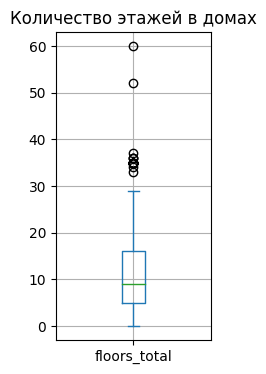

In [58]:
data.plot(y = 'floors_total', kind = 'box',grid=True, figsize=(2,4)); #посмотрим на выбросы в столбце floors_total
plt.title('Количество этажей в домах')

=> Большая часть этажей принадлежит к группе 'другой', на последнем этаже находится немного больше квартир, чем на первом. Самыми распространенными являются этажи с 5 по 16, выбросы находятся за пределами 30 этажа, имеются выбросы выше 50 этажа (таких этажей в СПб нет).

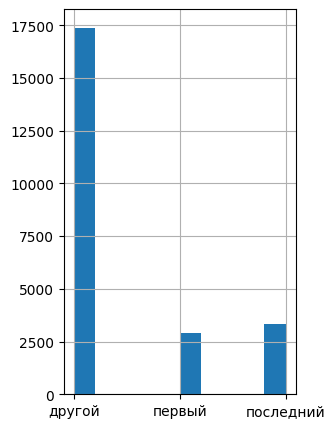

In [59]:
#посмотрим распределение на графике
data['floor_type'].hist(figsize=(3,5));

### Построим графики числовых значений


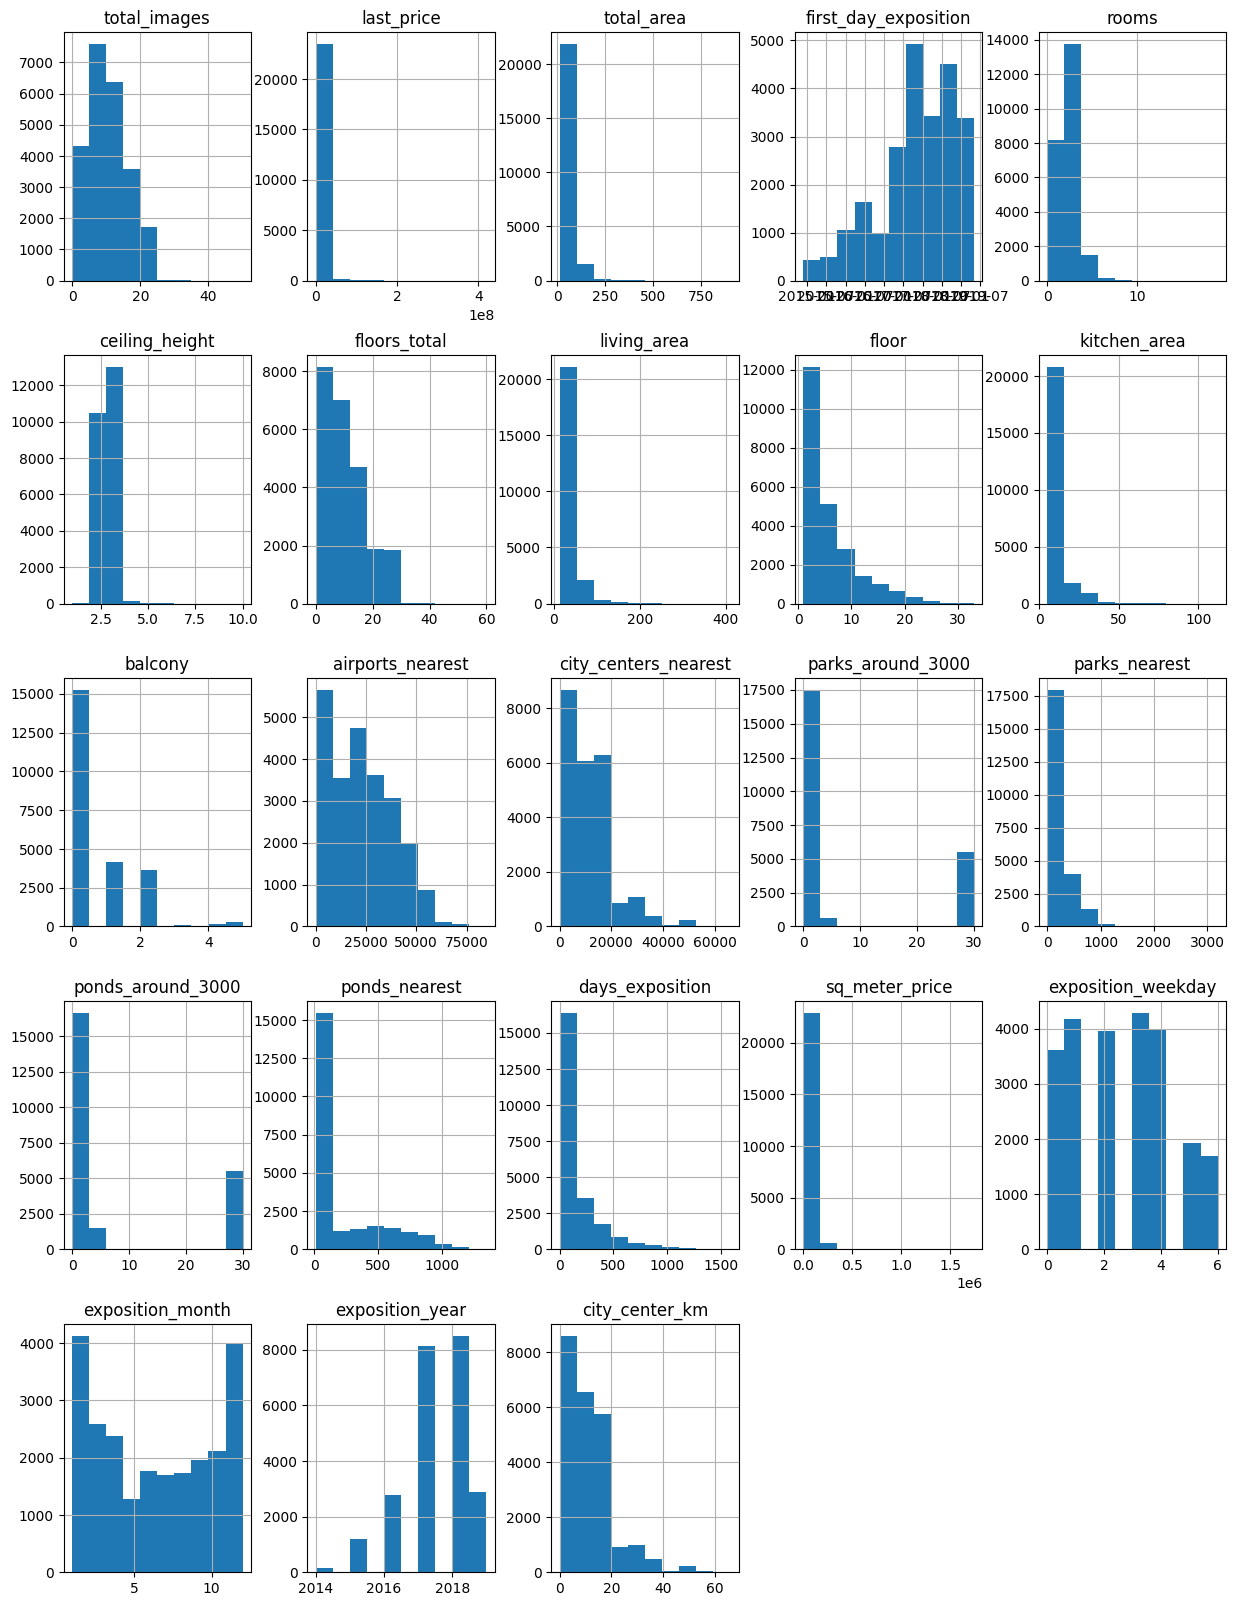

In [60]:
data.hist(figsize=(15,20));

In [61]:
#рассмотрим месяцы публикации объявлений
display((data.groupby('exposition_month').size() / len('data')).sort_values(ascending=False))

exposition_month
2     658.25
3     646.00
4     594.25
11    588.25
10    530.25
9     492.00
6     440.00
8     435.25
7     423.50
12    408.75
1     374.50
5     318.50
dtype: float64

=> Чаще всего объявления выкладывают в марте-мае, реже всего - в феврале и июне.

In [62]:
#создадим переменную data_for_days, чтобы удалить нулевое количествто дней продажи
data_for_days = data.query('days_exposition > 0')
display(data_for_days['days_exposition'].describe())

count    23638.000000
mean       160.855022
std        210.985236
min          1.000000
25%         30.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [63]:
# Рассчитаем Q1, Q3 и IQR для построения графика без выбросов
q1_dfd = data_for_days['days_exposition'].quantile(.25) #Q1
q3_dfd = data_for_days['days_exposition'].quantile(.75) #Q3
iqr_dfd = q3_dfd - q1_dfd #IQR

In [64]:
display('Нижние выбросы:', q1_dfd - 1.5 * iqr_dfd) #нижние выбросы - отрицательное значение

'Нижние выбросы:'

-223.5

In [65]:
display('Верхние выбросы:', q3_dfd + 1.5 * iqr_dfd) #верхние выбросы - 517.5

'Верхние выбросы:'

452.5

In [66]:
data['days_exposition'].describe()

count    23638.000000
mean       160.855022
std        210.985236
min          1.000000
25%         30.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

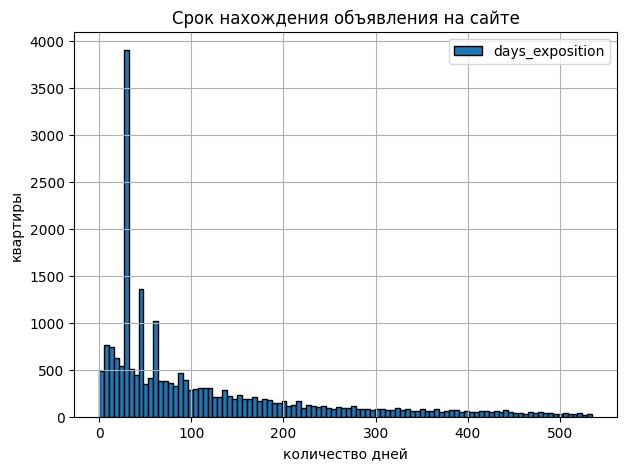

In [67]:
#построим гистограмму
data_for_days['days_exposition'].hist(bins=100, range=(0, 535), figsize=(7, 5), ec='black', legend=True)
plt.xlabel('количество дней')
plt.ylabel('квартиры')
plt.title('Срок нахождения объявления на сайте');

=> На графике отчетливо видны пики менее 90 дней, дальше график стремительно падает вниз, образуя длинный хвост. Среднее значение в 2 раза больше медианы, стандартное отклонение больше практически в 3 раза. Посмотрим на выбросы. 

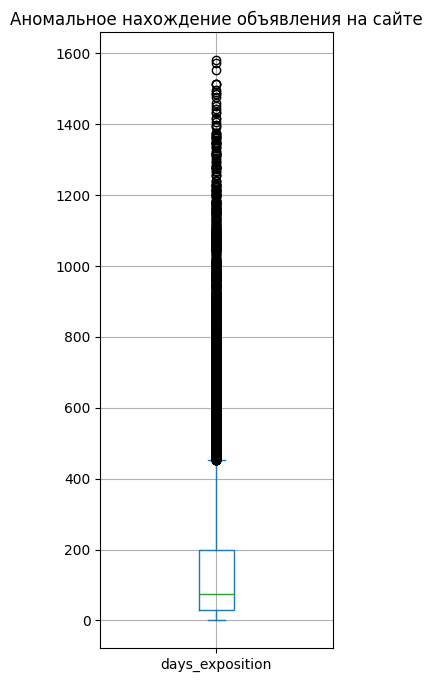

In [68]:
data_for_days = data_for_days.query('days_exposition > 0') #построим боксплот, чтобы оценить выбросы
data_for_days.plot(y = 'days_exposition', kind = 'box',grid=True, figsize=(3,8))
plt.title('Аномальное нахождение объявления на сайте');

=> На графике видим огромное количество выбросов, начинающихся с верхней допустимой границы выборки 452.5. Уменьшим период времени до Q3.

In [69]:
data_for_days = data_for_days.query('days_exposition <= 163')

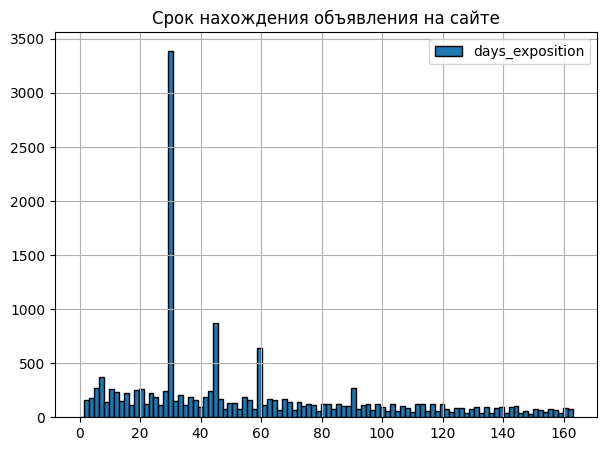

In [70]:
data_for_days['days_exposition'].hist(bins=100, range=(0, 163), figsize=(7, 5), ec='black', legend=True)
plt.title('Срок нахождения объявления на сайте');
#хвост по-прежнему слишком длинный

=> Большое количество около 0, пики между 40 и 60

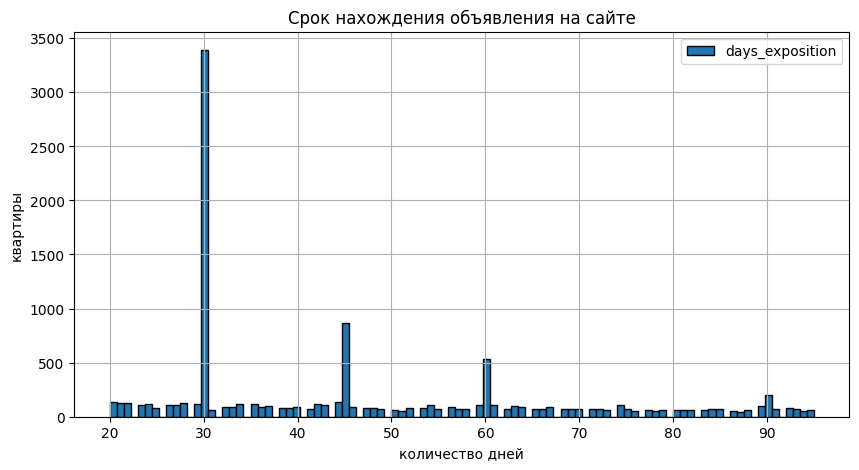

In [71]:
#посмотрим на значения пиков
data_for_days['days_exposition'].hist(bins=100, range=(20, 95), figsize=(10, 5), ec='black', legend=True) 
plt.xlabel('количество дней')
plt.ylabel('квартиры')
plt.title('Срок нахождения объявления на сайте')
plt.show()


=> На графике отчетливо видны пики в районе 30, 45 и 60 дней - чаще всего квартиры покупали именно за этот промежуток времени (от месяца-полутора до 2 месяцев). Также видим небольшой пик 90 дней. Далее график практически равномерно идет вниз. Примем границы 35-45-60-90 дней  за обычное время, до 30 - слишком быстро, после 90 - слишком медленно. Однако цифры настораживают своей "ровностью". возможно, объявление было снято с публикации по правилам сайта (нужно уточнить эту информацию). После 465 дня - выбросы. 

### Корреляция

Изучим факторы, влияющие на стоимость объекта; для этого изучим корреляцию между переменными. 


In [72]:
data_for_price = data.query('last_price > 3.450000e+06') #создадим срез данных по цене, за нижнюю границу примем Q1

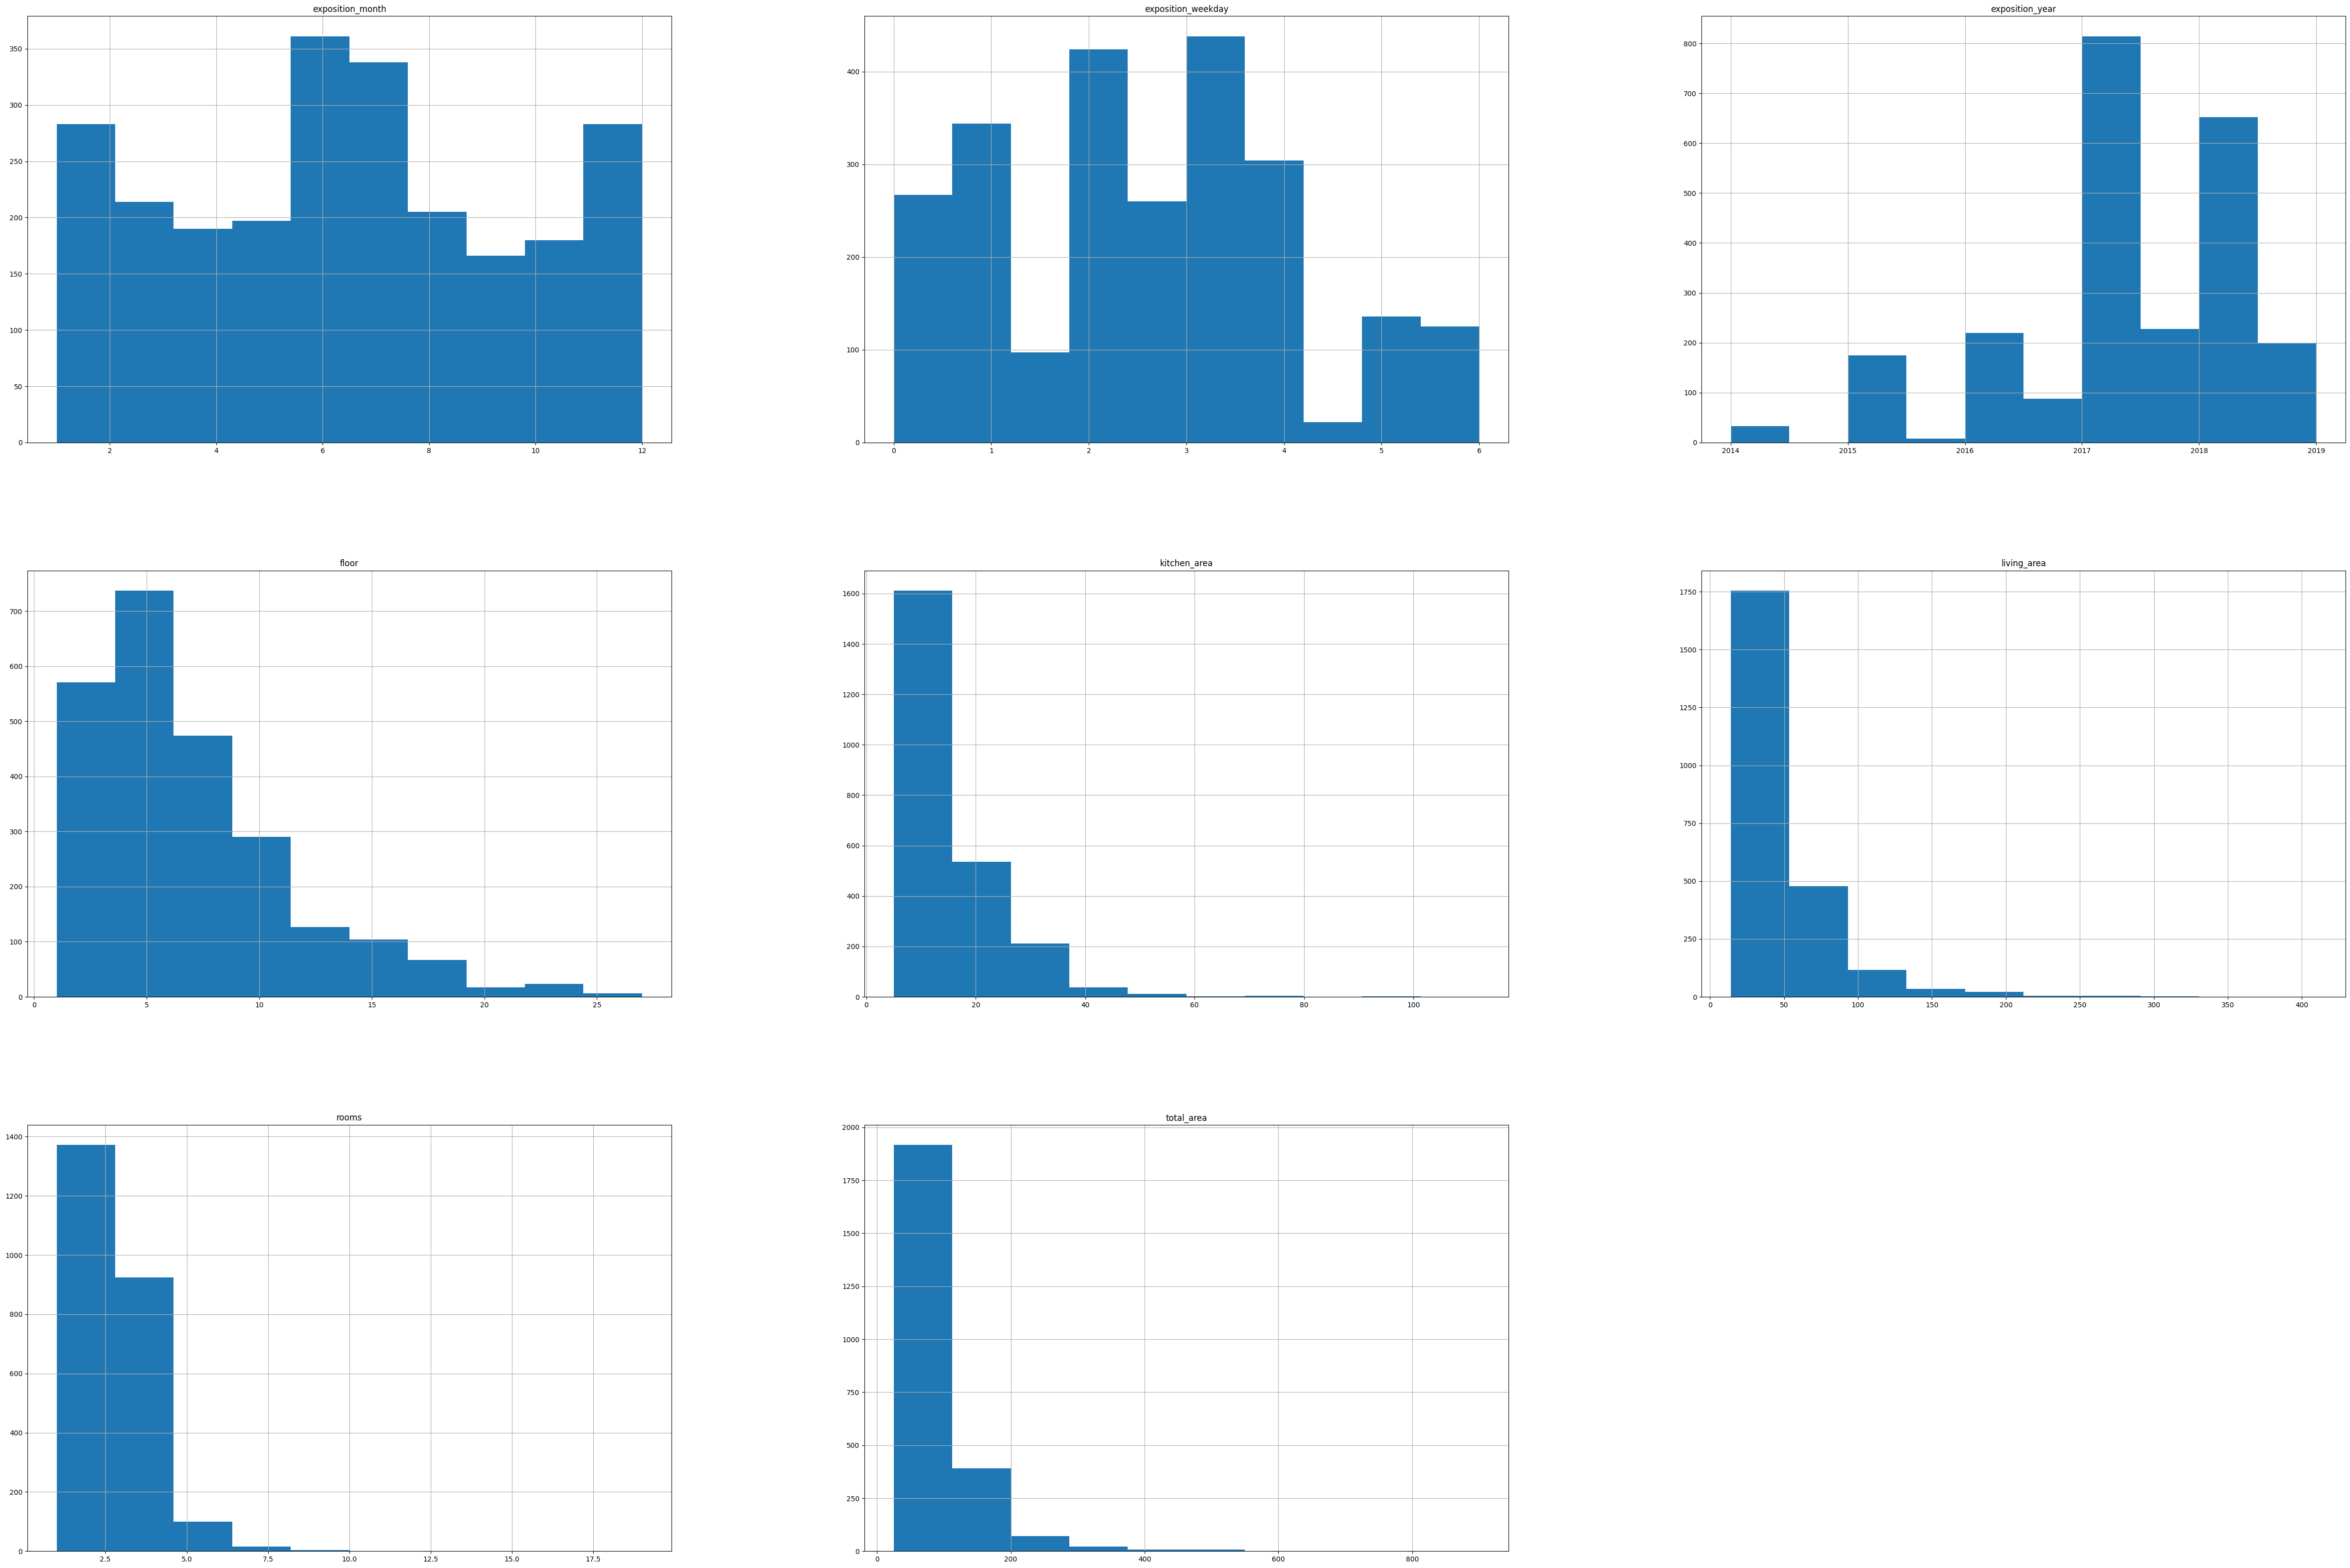

In [73]:
price_table = data_for_price.pivot_table(index='last_price', 
                                         values=['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', 
                                                 'exposition_weekday', 'exposition_month', 'exposition_year'])
price_table.hist(figsize=(60, 40)); #посмотрим, как менялась цена в соответствии с параметрами

=> Видим уменьшение количества купленных квартир и совокупной стоимости с увеличением параметров (большая часть графиков стремится к распределению Пуассона).

In [74]:
# Создадим список с параметрами для проверки
criteria = [
    'last_price',
    'total_area',
    'living_area',
    'rooms',
    'floor',
    'city_centers_nearest',
    'exposition_weekday',
    'exposition_month',
    'exposition_year',
    'airports_nearest',
    'parks_around_3000',
    'ponds_around_3000',
    'parks_nearest',
    'ponds_nearest']

In [75]:
#строим матрицу корреляции
display(data_for_price[criteria].corr())

,last_price,total_area,living_area,rooms,floor,city_centers_nearest,exposition_weekday,exposition_month,exposition_year,airports_nearest,parks_around_3000,ponds_around_3000,parks_nearest,ponds_nearest
last_price,1.000000,0.691547,0.576265,0.372571,-0.013958,-0.151165,-0.000056,-0.001576,-0.053744,0.024174,-0.067597,-0.064502,0.081589,0.044006
total_area,0.691547,1.000000,0.898657,0.741969,-0.069475,-0.161258,-0.004658,0.003791,-0.098459,-0.014587,-0.005054,-0.003001,0.070241,0.037692
living_area,0.576265,0.898657,1.000000,0.819566,-0.137058,-0.158777,-0.007212,0.000103,-0.093438,-0.029281,-0.011271,-0.012360,0.065722,0.041144
rooms,0.372571,0.741969,0.819566,1.000000,-0.198077,-0.113060,-0.004692,-0.004825,-0.072411,-0.045946,0.006590,0.003714,0.035751,0.020005
floor,-0.013958,-0.069475,-0.137058,-0.198077,1.000000,0.036799,0.017532,0.015147,0.018772,0.054408,0.008604,0.014150,-0.073538,-0.025421
city_centers_nearest,-0.151165,-0.161258,-0.158777,-0.113060,0.036799,1.000000,0.005271,-0.007447,0.014330,0.458436,-0.476989,-0.471576,-0.043029,0.072329
exposition_weekday,-0.000056,-0.004658,-0.007212,-0.004692,0.017532,0.005271,1.000000,0.009331,-0.003045,-0.001471,-0.000913,0.000739,-0.006217,-0.000564
exposition_month,-0.001576,0.003791,0.000103,-0.004825,0.015147,-0.007447,0.009331,1.000000,-0.276857,-0.002425,0.009858,0.009431,0.013989,0.004893
exposition_year,-0.053744,-0.098459,-0.093438,-0.072411,0.018772,0.014330,-0.003045,-0.276857,1.000000,-0.014432,0.040482,0.039752,-0.042715,-0.018021
airports_nearest,0.024174,-0.014587,-0.029281,-0.045946,0.054408,0.458436,-0.001471,-0.002425,-0.014432,1.000000,-0.581265,-0.583617,0.072225,0.083606


=> Стоимость квартиры коррелирует с общей площадью квартиры (коэф. 0.7), жилой площадью (коэф. 0.6), количеством комнат 
(коэф. 0.4). С ростом этих параметров стоимость квартиры будет увеличиваться. 
Небольшая корреляция также есть с удаленностью от центра (-0.15). Чем дальше от центра, тем ниже стоимость, однако изменения 
незначительные. 

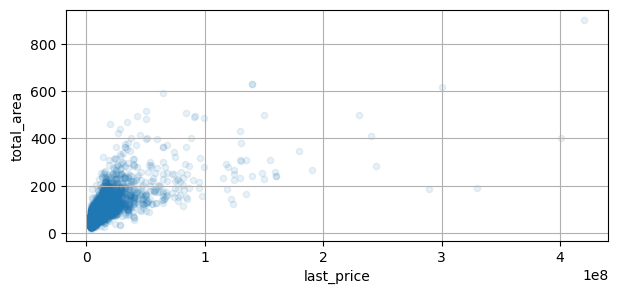

In [76]:
#строим диаграммы рассеивания
data_for_price.sort_values('last_price').plot(x='last_price', y='total_area', kind='scatter', alpha = 0.1, 
                                              figsize=(7,3), grid=True);

положительная корреляция

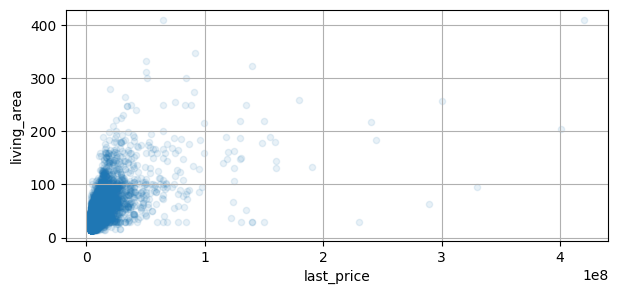

In [77]:
data_for_price.sort_values('last_price').plot(x='last_price', y='living_area', kind='scatter', alpha = 0.1, 
                                              figsize=(7,3), grid=True);

положительная корреляция

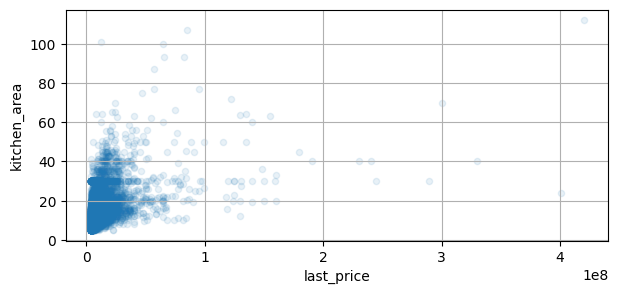

In [78]:
data_for_price.sort_values('last_price').plot(x='last_price', y='kitchen_area', kind='scatter', alpha = 0.1, 
                                              figsize=(7,3), grid=True);

положительная корреляция

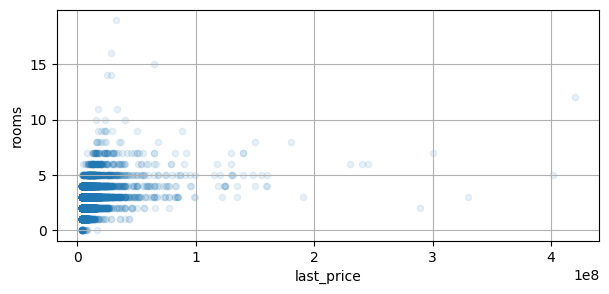

In [79]:
data_for_price.sort_values('last_price').plot(x='last_price', y='rooms', kind='scatter', alpha = 0.1, 
                                              figsize=(7,3), grid=True);

положительная корреляция (слабая)

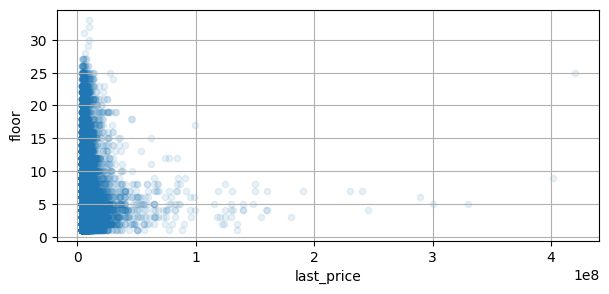

In [80]:
data_for_price.sort_values('last_price').plot(x='last_price', y='floor', kind='scatter', alpha = 0.1, 
                                              figsize=(7,3), grid=True);

корреляции нет

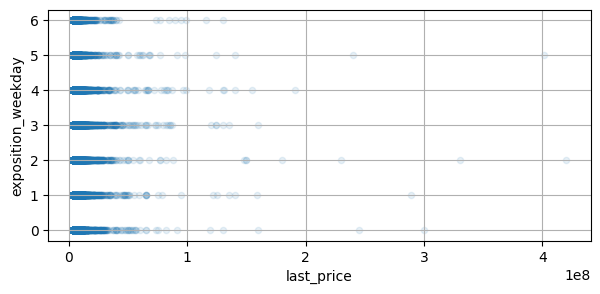

In [81]:
data_for_price.sort_values('last_price').plot(x='last_price', y='exposition_weekday', kind='scatter', alpha = 0.1, 
                                              figsize=(7,3), grid=True);

корреляции нет

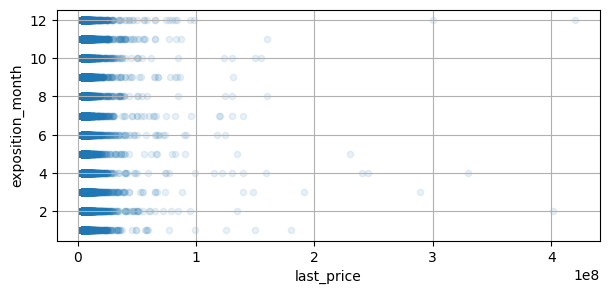

In [82]:
data_for_price.sort_values('last_price').plot(x='last_price', y='exposition_month', kind='scatter', alpha = 0.1, 
                                              figsize=(7,3), grid=True);

корреляции нет

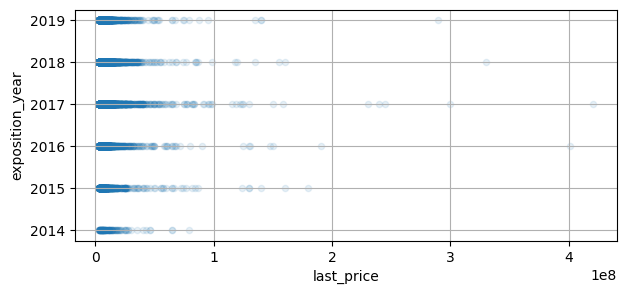

In [83]:
data_for_price.sort_values('last_price').plot(x='last_price', y='exposition_year', kind='scatter', alpha = 0.1, 
                                              figsize=(7,3), grid=True);

корреляции нет

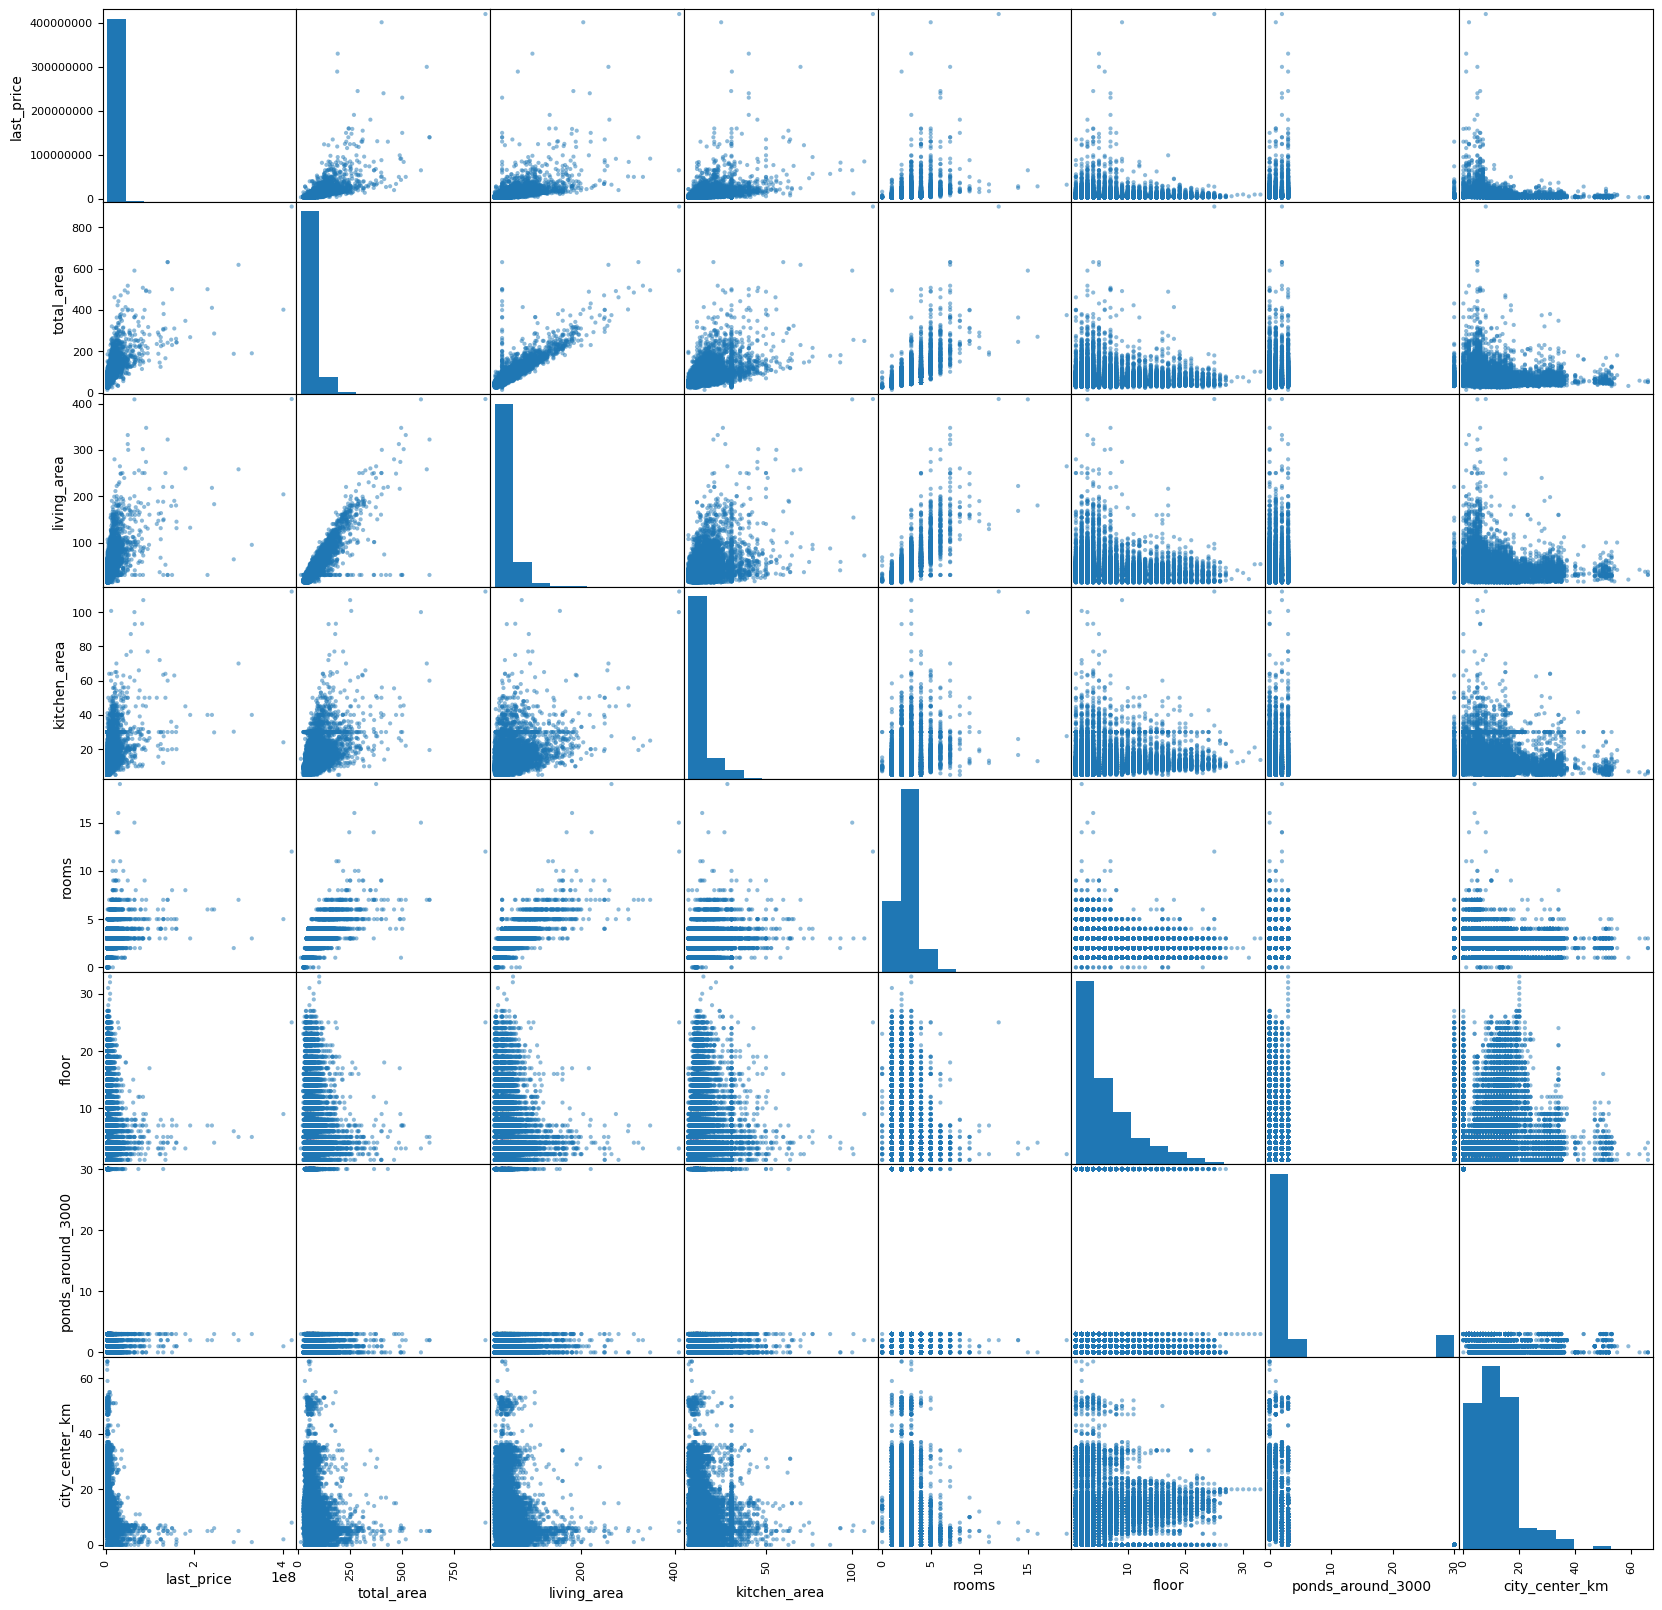

In [84]:
#строим матрицу корреляции

pd.plotting.scatter_matrix(data_for_price[['last_price',
                                           'total_area', 
                                           'living_area', 
                                           'kitchen_area', 
                                           'rooms', 
                                           'floor', 
                                           'ponds_around_3000',
                                           'city_center_km'
                                           ]], figsize=(20,20));

=> Матрица и диаграммы в целом подтверждают сделанные выводы о том, что наибольшее влияние на стоимость квартиры оказывают общая и жилая площади, площадь кухни: графики стремительно растут вверх => чем выше будут эти параметры, тем выше будет цена. 
Еще одним отмеченным параметром было количество комнат. Коэффициент небольшой, и на графике сильную зависимость мы не наблюдаем. В целом, это логично, потому что в двух разных квартирах могут быть по 2 комнаты, только в одной площадь комнат будет в 2 раза больше. Соответственно, зависимость все равно идет от площади квартоиры. 
Также есть корреляция с площадью кухни, чем она больше, тем цена выше, однако, опять же, зависимость от площади. 
Мы отметили, что корреляция с этажом отсутствует, но по диаграмме видно, что на нижних этажах корреляция небольшая есть (обычно 1 этаж стоит дешевле), с ростом этажей корреляция падает.
Корреляция с водоемами практически незаметна, вряд ли она окажет существенное влияние на стоимость.
Корреляция с расположением относительно центра наблюдается на более близких километрах: ближе к центру цена значительно выше, и сильнее меняется, чем дальше от центра, затем корреляция пропадает.

### Рассмотрим данные по 10 городам с наибольшим количеством объявлений
Одной из задач исследования является изучение параметров в городах с наибольшим количеством объявлений.

In [85]:
ten_cities = data_for_price['locality_name'].value_counts().head(10) #список 10 городов
display(ten_cities)

locality_name
санкт-петербург    14249
пушкин               320
пгт шушары           284
пгт парголово        268
пгт мурино           259
всеволожск           198
дер кудрово          188
колпино              188
сестрорецк           168
кудрово              133
Name: count, dtype: int64

In [86]:
ten_cities = data_for_price.query('locality_name in @ten_cities.index') #выведем стоимость за кв.м.
ten_cities_pivot = ten_cities.pivot_table(index='locality_name', values='sq_meter_price', aggfunc='median').sort_values(by='sq_meter_price', ascending=False)
display(ten_cities_pivot)

,sq_meter_price
locality_name,
санкт-петербург,106548.0
кудрово,101764.0
пушкин,100376.5
сестрорецк,99958.5
пгт парголово,93717.0
дер кудрово,92076.0
пгт мурино,84043.0
пгт шушары,76626.0
колпино,73782.5


=> Список населенных пунктов с наибольшим количеством объявлений: Санкт-Петербург (14249), Кудрово (321), Пушкин (320),  поселок Шушары (284), Мурино (282), поселок Парголово (268), Всеволожск (198), Колпино (188), Сестрорецк (168), Петергоф (125). Также высчитали стоимость одного кв.м. в каждом из этих городов. Цена варьируется от 66 тысяч до 106 тысяч. Дешевле всего кв.м. стоит в Всеволожске, дороже всех - в Санкт-Петербурге. 
В связи с этим имеет смысл рассмотреть Санкт-Петербург отдельно. 

In [87]:
#посмотрим на финальную таблицу
display(data_for_price)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,is_monoapart,rooms_and_studio,sq_meter_price,exposition_weekday,exposition_month,exposition_year,floor_type,city_center_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.000000,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,30.0,not_mono,flat,120370.0,3,3,2019,другой,16.0
2,10,5196000.0,56.00,2015-08-20,2,3.00,5,34.3,4,True,False,False,8.300000,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,not_mono,flat,92786.0,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,3.00,14,80.2,9,True,False,False,11.733333,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,not_mono,flat,408176.0,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.000000,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,not_mono,flat,100000.0,1,6,2018,другой,8.0
6,6,3700000.0,37.30,2017-11-02,1,3.00,26,30.0,6,True,False,False,14.400000,1,пгт парголово,52996.0,19143.0,0.0,30.0,0.0,30.0,155.0,not_mono,flat,99196.0,3,11,2017,другой,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000.0,52.00,2018-07-19,2,3.00,5,31.0,2,True,False,False,6.000000,0,санкт-петербург,20151.0,6263.0,1.0,300.0,0.0,30.0,15.0,not_mono,flat,105769.0,3,7,2018,другой,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,True,False,False,10.600000,1,санкт-петербург,19424.0,4489.0,0.0,30.0,1.0,806.0,519.0,not_mono,flat,129904.0,3,10,2016,другой,4.0
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,True,False,False,8.000000,0,петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,not_mono,flat,73718.0,4,8,2016,другой,34.0
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,True,False,False,13.830000,0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,30.0,not_mono,flat,72491.0,1,3,2017,другой,4.0


In [88]:
display(data_for_price.describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,sq_meter_price,exposition_weekday,exposition_month,exposition_year,city_center_km
count,17608.000000,1.760800e+04,17608.000000,17608,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,17608.000000,1.760800e+04,17608.000000,17608.000000,17608.000000,17608.000000
mean,10.350352,7.877655e+06,67.139744,2017-11-09 12:21:05.970013440,2.277885,2.851577,11.428044,38.472318,6.309802,11.881704,0.629089,25869.525784,12009.186449,3.467742,220.823262,3.613471,251.321047,164.495173,1.103339e+05,2.560541,6.416458,2017.367390,12.000738
min,0.000000,3.455000e+06,13.000000,2014-11-27 00:00:00,0.000000,1.000000,0.000000,14.000000,1.000000,5.000000,0.000000,0.000000,30.000000,0.000000,1.000000,0.000000,13.000000,1.000000,2.432400e+04,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,4.320000e+06,45.000000,2017-05-09 00:00:00,1.000000,2.607500,5.000000,25.992500,3.000000,8.000000,0.000000,15632.000000,5857.000000,0.000000,30.000000,0.000000,30.000000,30.000000,8.619000e+04,1.000000,3.000000,2017.000000,6.000000
50%,10.000000,5.500000e+06,58.300000,2017-12-13 00:00:00,2.000000,3.000000,9.000000,33.300000,5.000000,10.000000,0.000000,24901.000000,12065.000000,1.000000,30.000000,1.000000,30.000000,75.000000,1.017985e+05,3.000000,6.000000,2017.000000,12.000000
75%,15.000000,7.900000e+06,76.100000,2018-09-06 00:00:00,3.000000,3.000000,16.000000,45.500000,9.000000,13.000000,1.000000,36007.000000,15402.250000,1.000000,392.000000,2.000000,459.000000,203.000000,1.216220e+05,4.000000,10.000000,2018.000000,15.000000
max,50.000000,4.200000e+08,900.000000,2019-05-03 00:00:00,19.000000,10.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,30.000000,3190.000000,30.000000,1341.000000,1580.000000,1.736842e+06,6.000000,12.000000,2019.000000,66.000000
std,5.794417,1.092251e+07,38.337601,NaN,1.095365,0.275898,6.618450,23.289794,5.003713,6.814134,1.012350,14546.717570,8458.631335,8.721177,318.831931,8.687259,306.711434,217.438125,5.011384e+04,1.787029,3.489903,1.065961,8.471156


### Посмотрим данные по Петербургу

In [89]:
data_spb = ten_cities.query('locality_name == "санкт-петербург" ') #сделаем срез

=> посмотрим, есть ли связь между стоимостью кв.м. и расстоянием до центра города 

In [90]:
display(data_spb['city_center_km'].corr(data_spb['sq_meter_price'])) 

-0.31677307446843367

да, связь есть: чем дальше от центра города, тем дешевле квадратный метр

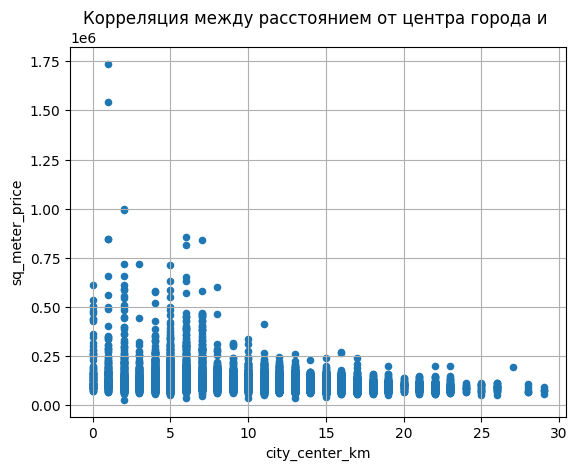

In [91]:
#рассмотрим корреляцию на графиках 
data_spb.plot(kind='scatter', x = 'city_center_km', y= 'sq_meter_price', grid=True, legend=False)
plt.title('Корреляция между расстоянием от центра города и ')
plt.show()

In [92]:
#оценим стоимость кв.м. в связи с удалением от центра
corr_matrix_spb = data_spb.pivot_table(index='city_center_km', values='sq_meter_price', aggfunc='mean').sort_values(by='sq_meter_price', ascending=False)
display(corr_matrix_spb)

,sq_meter_price
city_center_km,
27.0,193919.000000
0.0,187055.940476
1.0,176885.005236
2.0,158511.200658
7.0,157122.966019
6.0,151764.315702
5.0,140842.273128
4.0,131285.610619
8.0,127087.194690


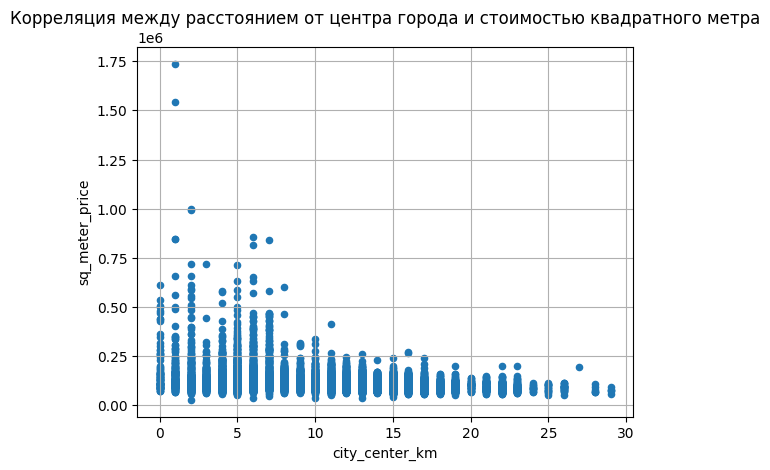

In [93]:
#рассмотрим корреляцию на графиках 
data_spb.plot(kind='scatter', x = 'city_center_km', y= 'sq_meter_price', grid=True, legend=False)
plt.title('Корреляция между расстоянием от центра города и стоимостью квадратного метра')
plt.show()

=> чем дальше, тем дешевле (есть исключения)


В 27 км от СПб находится граница с г. Пушкин и расположен Царское село.

=> Коэффициент корреляции составил -0.3. По диаграмме размаха мы видим, что с удаленностью от центра стоимость квадратного метра снижается. Дороже всего стоимость в 27 км (достопримечательности) - 194 тыс, в пределах 7 км от центра, от 131 тыс до 187, хотя есть небольшое падение в цене на расстоянии в 3 км. Возможно, это связано с тем, что в этой зоне находятся вокзалы. Далее 7 км цена постепенно снижается.

# Общий вывод

Для анализа был представлен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Чтобы провести исследовательский анализ данных, мы рассчитали и добавили в таблицу несколько новых столбцов: стоимость одного квадратного метра, день, месяц и год публикации, категории для этажей (первый, последний, другой, не указан), расстояние до центра города в километрах, расстояние до парков и водоемов. 

Изучили:
* общую площадь квартир (общая площадь квартир составляет 52 кв.м., разброс от 40 до 70 кв.м.; можно также найти квартиры площадью до 18 кв.м. и до 590 кв.м.).  
* жилую площадь (в среднем составляет 30 кв.м., разброс от 19 до 43 кв.м.; можно найти квартиры с жилой площадью до 14 и 409 кв.м.)
* площадь кухни (в среднем составляет 9 кв.м.; разброс от 7 до 12 кв.м.; есть кухни до 107 кв.м.)

В основном на продажу выставлены двухкомнатные квартиры, а также одно- и трех-комнатные, есть квартиры, в которых до 19 комнат. 
Высота потолков стандартная, до 3 метров. Есть квартиры с высокими потолками. 
17395 этажей относится к категории «другой» (не первый и не последний). Половина квартир располагается на 4-5 этажах,  с разбросом от 1 до 8. Этажность доходит до 33 этажа. Первые и последние этажи имеют практически одинаковое распределение: 2914 и 3329.

Дома в основном пяти-, 9-ти и 16-тиэтажки. Отмечаем наличие выбросов, поскольку есть значения выше 50, 60, что невозможно в СПб. Однако эти выбросы не влияют на ход и результаты исследования, поэтому оставили как есть. 

В среднем дома располагаются в 11-12 км от центра, разброс от 2 до 15 км. Есть дома в 66 км., а также дома без указания этого значения (восстановить его невозможно, подразумеваем, что дом находится далеко). 

В среднем дома находятся в 20 км от аэропорта, разброс от 10 км до 34 км. Есть дома, которые находятся на расстоянии до 85 км.

По паркам очень много пропусков. Либо информации нет, либо парков нет рядом. Чаще всего рядом бывает 1 парк, на расстоянии 2.65 км.  

Объявления чаще всего выкладывают в будние дни, чаще в четверг, в целом со вторника по пятницу, чуть реже в понедельник. В выходные дни количество объявление меньше более чем в 2 раза. 

Наиболее популярными месяцами для размещения объявлений являются февраль, июль и ноябрь.

Мы также составили списки с наибольшим количеством объявлений: Санкт-Петербург (14249), Кудрово (321), Пушкин (320),  поселок Шушары (284), Мурино (282), поселок Парголово (268), Всеволожск (198), Колпино (188), Сестрорецк (168), Петергоф (125). Также высчитали стоимость одного кв.м. в каждом из этих городов. Цена варьируется от 66 тысяч до 106 тысяч. Дешевле всего кв.м. стоит в Всеволожске, дороже всех - в Санкт-Петербурге. 

В связи с этим мы рассмотрели Санкт-Петербург отдельно. Интересно было посмотреть на корреляцию между расстоянием до центра города и стоимостью кв.м. Коэффициент корреляции составил -0.3. По диаграмме размаха мы видим, что с удаленностью от центра стоимость квадратного метра снижается. Дороже всего стоимость в 27 км (достопримечательности) - 194 тыс, в пределах 7 км от центра, от 131 тыс до 187, хотя есть небольшое падение в цене на расстоянии в 3 км. Возможно, это связано с тем, что в этой зоне находятся вокзалы. Далее 7 км цена постепенно снижается.

Основной целью исследования было изучить, какие факторы влияют на ценообразование. 

Выводы:
1) Стоимость квартиры не зависит от дня недели, месяца и года публикации. Коэффициент корреляции находится в границах 0.


2) Высота этажа может незначительно повлиять на увеличение стоимости (0.1)


3) Сильнее связь с расстоянием от дома до центра города. Коэффициент корреляции отрицательный, -0.2, связь не большая, однако можно прийти к выводу, что чем дальше квартира от центра, тем ниже цена.


4) Сильное влияние на цену оказывают параметры, связанные с площадью квартиры. Так, на стоимость квартиры оказывает влияние количество комнат. Коэффициент коррреляции = 0.4. Соответственно, увеличение количества комнат вызывает увеличение стоимости квартиры. 

5) Цена может зависеть и от наличия парков и водоемов: если в пределах 3 км нет парка, то цена может значительно снизиться (коэф. -0.5), если парк(-и) рядом есть, то цена может немного вырасти (коэф. 0.2). Если в пределах 3 км нет водоемов, то цена также может значительно снизится (-0.5), если есть вблизи, то это немного повысит стоимость (0.2). 

6) Наибольшее влияние на ценообразование оказывают общая и жилая площади квартиры, коэффициенты 0.75 и 0.66. Увеличение площади напрямую связано с увеличением общей стоимости, которая базируется на стоимости квадратного метра. 

Таким образом, основное влияние на стоимость квартиры оказывают метраж (общая площадь квартиры, жилая площадь квартиры, количество комнат), этаж и расположение (расстояние до центра, парка, водоема).